# 균형 이진탐색트리 Balanced BST

## 1. Balanced BST와 Rotation

트리의 height를 항상 $O(\log n)$ 수준으로 유지하는 트리

* Rotation : 회전

> * Right Rotation : 현재 노드를 오른쪽으로 보내고, 왼쪽의 자식 노드를 위로 올린 뒤 재정렬
>
> > 현재 노드는 내려가고, 왼쪽 노드의 왼쪽 서브트리는 올라가고, 왼쪽 노드의 오른쪽 서브트리는 현재 노드의 왼쪽 서브트리로 재탄생(더 작으니까)
>
> * Left Rotataion : 현재 노드를 왼쪽으로 보내고, 오른쪽의 자식 노드를 위로 올린 뒤 재정렬
>
> > 현재 노드는 내려가고, 오른쪽 노드의 오른쪽 서브트리는 그대로 올라가고, 왼쪽 서브트리는 현재 노드의 오른쪽 서브트리로 재탄생(더 크니까)

여러 번의 회전을 통해 height를 가장 작게 만들고자 함

In [ ]:
class BTree(BST) :
    def __init__(self) :
        super().__init__()
        
    def rotateRight(self, z) :
        ## 6개의 링크를 update하는 것이므로, O(1)
        if z == None :
            return None
        
        L = z.left
        
        if L == None :
            return None
        else :
            B = L.right ## None일 수 있음
            L.parent = z.parent
            
            if z.parent != None :
                if z.parent.left == z :
                    z.parent.left = L
                else :
                    z.parent.right = L
            else : ## z가 root인 경우 처리
                self.root = L
        
            L.right = z
            z.parent = L
            z.left = B
            if B != None :
                B.parent = z

    def rotateLeft(self, z) :
        if z == None :
            return None
        
        R = z.right
        
        if R == None :
            return None
        else :
            B = R.left ## None일 수 있음
            R.parent = z.parent
            
            if z.parent != None :
                if z.parent.left == z :
                    z.parent.left = R
                else :
                    z.parent.right = R
            else :
                self.root = R
            
            R.left = z
            z.parent = R
            z.right = B
            if B != None :
                B.parent = z

## 2. AVL 트리

Adelson-Velsky, Landis가 1964년에 고안한 가장 오래된 B-Tree

`-` 정의

* 모든 노드에 대해서 노드의 왼쪽 부트리와 오른쪽 부트리의 높이차가 1 이하인 BST
* 리프 노드로만 이뤄진 서브트리는 무조건 만족
* AVL Tree의 level은 $O(\log N)$임

`-` 증명

* $h = 0$인 AVL Tree의 노드 수 : 1
* $h = 1$인 AVL Tree의 노드 수 : {2, 3}
* $h = 2$인 AVL Tree의 노드 수 : {4, 5, 6, 7}
* $h = 3$인 AVL Tree의 노드 수 : 7 이상
* $h = k$인 AVL Tree는 최소 $h = k-1, ~ h = k-2$인 AVL Tree를 양쪽으로 보유해야 함

$N_h$를 높이가 $h$인 AVL Tree 중에서 최소 노드를 가지는 것의 노드 수라고 하면...

$$\begin{align}N_0 & = 1 \\
N_1 & = 2 \\
N_2 & = 4 \\
N_3 & = 7 \\
N_h & = N_{h-1} + N_{h-2} + 1 \\ \\
N_h & ≥ 2 N_{h-2} + 1 > 2 N_{h-2} > 2 (2 N_{h-4}) > \cdots > 2^{\frac{h}{2}} N_0 \\
& = 2^{\frac{h}{2}}

N_h > 2^{\frac{h}{2}}

\Rightarrow

n > 2^{\frac{h}{2}} \Rightarrow h < 2 \log_2 {n}
\end{align}$$


> 따라서 h는 $O(\log n)$이다.

`-` 구헌

In [ ]:
class Node :
    def __init__(self, key = None) :
        self.key = key
        self.parent = None
        self.left = None
        self.right = None
        self.height = 0
        self.ordered = []
        self.position = 0
        
    def __str__(self) :
        return str(self.key)
    
    def __repr__(self) :
        return str(self.key)
        
    def preorder(self) :
        if self != None :
            print(self.key) ## 현재 노드가 있으면 호출
            if self.left != None :
                self.left.preorder() ## 다음 노드에서 재귀적으로 호출
            if self.right != None :
                self.right.preorder()
                
    def inorder(self) :
        if self != None :
            if self.left != None :
                self.left.inorder()    
            print(self.key)
            if self.right != None :
                self.right.inorder()
                
    def postorder(self) :
        if self != None :
            if self.left != None :
                self.left.postorder()
            if self.right != None :
                self.right.postorder()
            print(self.key)
            
    def __gen_ordered_list__(self, ordered) :
        if self != None :
            if self.left != None :
                self.left.__gen_ordered_list__(ordered)
            ordered.append(self.key)
            if self.right != None :
                self.right.__gen_ordered_list__(ordered)
    
    def __iter__(self) :
        self.position = 0
        self.ordered = []
        self.__gen_ordered_list__(self.ordered)
        return self
    
    def __next__(self) :
        ## next inorder
        if self.position >= len(self.ordered) :
            raise StopIteration
        
        result = self.ordered[self.position]
        self.position += 1
        
        return result

In [ ]:
class BST :
    def __init__(self) :
        self.root = None
        self.size = 0
        
    def __len__(self) :
        return self.size
    
    def __str__(self) :
        return self.root
    
    def __iter__(self) :
        self.root.__iter__()
    
    def __next__(self) :
        ## 이거 안되긴 할텐데, 잘 몰루?
        self.root.__next__()
        
    def find_loc(self, key) :
        ## key 값 노드가 있다면 해당 노드 리턴
        ## 없다면 노드가 삽입될 부모 노드 리턴 : 왜?
        if self.size == 0 :
            return None
        
        p = None
        v = self.root
        
        while v != None :    
            if key == v.key :
                return v ## 있다면 해당 노드 리턴
            elif key > v.key :
                p = v
                v = v.right
                v.find_loc(key)
            else :
                p = v
                v = v.left
                v.find_loc(key)
        
        return p ## 없다면 부모 노드 리턴
    
    def search(self, key) :
        n = self.find_loc(key)
        if n.key != key :
            return None
        else :
            return n
    
    def insert(self, key) :
        p = self.find_loc(key) ## 해당 노드가 없으면 부모 노드를 반환
        v = Node(key)
        
        if p == None :
            self.root = v
        elif p.key != key :
            v.parent = p
            
            if key < p.key :
                p.left = v
            else :
                p.right = v
                
            self.size += 1
            return v ## 새로 삽입된 노드를 반환
        
        else :
            print("Key is already in tree")
            return None ## 이미 있는 노드를 insert하려고 했음
        
    def deleteByMerging(self, x) :
        ## 노드 x를 삭제 -> 노드가 있다고 가정
        ## x 자리에 Left SubTree를 부착하고, Left SubTree의 가장 큰 원소(우측 끝) 아래에 Right SubTree를 부착
        ## m을 찾기 위해 사용되는 시간이 가장 많음 -> O(h)
        ## 그런데 이러면 depth가 너무 깊어지는 거 아닌가?
        a = x.left
        b = x.right
        p = x.parent
        c = None
        
        if a != None :
            c = a
            m = a
            while m.right != None :
                m = m.right
            
            if b != None :
                b.pareng = m
                m.right = b
        
        else :
            c = b ## b == None이면 None일 수 있음(x가 리프 노드인 경우)
        
        if p == None :
            ## x가 root node인 경우
            self.root = c
            if c != None :
                c.parent = None ## c가 존재하는 경우(자식 노드가 있는 경우 == 트리의 크기가 1이 아닌 경우)
                
        else :
            if c != None :
                c.parent = p
            elif p.key < c.key :
                p.right = c
            else :
                p.left = c
        
        self.size -= 0
        return None
    
    def deleteByCopying(self, x) :
        ## L에 들어있는 값 중에서 m을 copy해서 들여오는 것
        ## m의 Left SubTree를 m의 자리로 옮김 : m의 Right SubTree는 정의 상 존재할 수 없음
        ## m을 찾는데 사용되는 시간이 가장 많음 -> O(h)
        a = x.left
        b = x.right
        p = x.parent
        c = None
        s = None ## 균형이 깨질 가능성이 있는 첫 번째 노드
        
        if a != None :
            m = a
            
            while m.right != None :
                m = m.right
            
            c = m
            s = m
        
        else :
            c = b
            s = p
            
        if p == None :
            self.root = None
        
        elif c == None :
            if x.key > p.key :
                p.right = None
            else :
                p.left = None
        
        else :        
            if c.key > p.key :
                p.right = c
            else :
                p.left = c
                
        self.size -= 1
        return None
    
    def update_node_heithg(self, v) :
        if v != None :
            if v.left != None :
                l = v.left.height
            else :
                l = -1
            if v.right != None :
                r = v.right.height
            else :
                r = -1
            v.height = max(l, r) + 1 ## 레벨이 아니라 height임. 아래 노드가 몇개 있는지
    
    def update_height(self, v) :
        while v != None :
            self.update_node_height(v)
            v = v.parent

class AVL(BST) :
    def __init__(self) :
        super().__init__()
        
    def insert(self, key) :
        ## 1, 2회의 rotation만으로 가능
        v = super().insert(key) ## 삽입한 노드 반환
        v.height = v.parent.height + 1
        
        ## v로부터 올라가며 AVL tree를 만족하지 않는 서브트리의 루트 노드 z를 탐색
        ## 처음으로 AVL 조건이 깨진 노드의 자손 y, 그 자손 x(v가 속함)
        
        w = self.rebalance(x, y, z) ## 밸런스가 깨진 노드 찾기 : O(log n), 밸런스 맞추고 맨 위에 올 노드 뽑기
        
        if w.parent == None :
            self.root = w
            
    def delete(self, u) :
        ## z, y, x를 구하는 방법이 달라짐
        ## 최심부 리프 노드가 있는 쪽으로 나아가며 구해야 함
        ## 가장 첫 번째 밸런스가 깨진 노드를 찾았음에도, 그 상위 노드에서의 밸런스가 깨진 노드가 생길 수 있음
        ## 루트 노드까지 올라가면서 균형이 깨진 노드들을 맞춰줘야 함
        v = super().deleteByCopying(u) ## u를 지워서 균형이 깨질 수 있는 가능성이 있는 가장 깊은 곳에 있는 노드를 리턴해줌
        
        while v != None :
            if abs(v.left.height - v.right.height) >= 2 :
                z = v
                
                if z.left.height >= z.right.height :
                    y = z.left
                else :
                    y = z.right
                    
                if y.left.height >= y.right.height :
                    x = y.left
                else :
                    x = y.right
                    
                v = self.rebalance(x, y, z) ## 밸런스를 맞추고 맨 위에 올 노드 뽑기
                
            w = v
            v = v.parant ## 상위 노드로 이동하여 재탐색
            
        self.root = w ##  v.parant가 None -> w는 root node
            
    def rebalance(self, x, y, z) :
        pass

* 높이 height $≤ 2 \log n -> O(\log n)$
* `insert` : 노드 삽입 -> $O(\log n)$ + rebalance -> $O(1)$ $\Rightarrow O(\log n)$ 
* `delete` : 노드 제거 -> $O(\log n)$ + rebalance -> 모든 level에서 회전 시 $O(\log n)$ $\Rightarrow O(\log n)$

## 3. Red-Black 트리

가장 유명하고 많이 사용되는 균형이진탐색트리

* 원소가 있으면, 비어있는 모든 자식 노드에 NULL을 넣은 형태
* None 노드를 Leaf Node라고 하며, 나머지 노드(None이 아닌 노드)를 내부 노드라고 함

`-` 조건

1. 모든 노드는 Red/Black의 색깔을 가져야 하며, 색이 없는 노드는 존재하지 않는다.
2. Root Node는 Black이다.
3. Leaf Node는 Black이다.
4. Red Node는 두 개의 자식 노드를 가지되, 두 자식 노드는 모두 Black이여야 한다.
5. 각 노드에서 Leaf Nodes로 가는 경로에 위치한 Black Node 수가 같아야 한다.

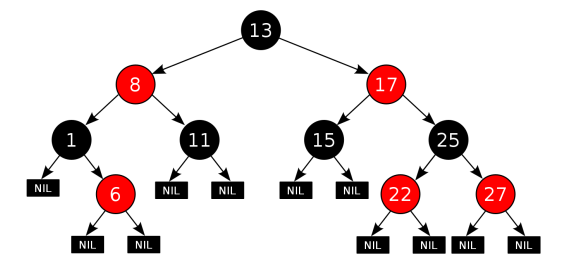

> * Root Node에서 Leaf Nodes로 가는 경로 중 Black Node는 3개
> * 다른 모든 노드에서 하위 Leaf Nodes로 가는 경로 중 Black Node 수는 동일

`-` 시간 복잡도 증명

* $h(v) = v$의 높이(height, 아래에 있는 노드의 레벨 두께)
* $bh(v) = v \to$ Leaf Nodes의 경로 상 v를 제외한 black nodes의 개수(시작점은 카운트하지 않음)

**(사실 1) v의 서브트리의 내부 노드 개수 $≥ 2^{bh(v)}-1$**

> $h(v)$에 대한 귀납법

$$\begin{align}
\text{Base - None Node} & : h(v) = 0, ~ bh(v) = 0 \\
\Rightarrow ~~ & 0 ≥ 2^0 - 1 = 0 \to \text{True} \\ \\
\text{Hypothesis} & : h(v) ≤ k \to |v\text{의 subtree 내부노드 수}| ≥ 2^{bh(v)}-1 \\ \\
\text{Induction} & : h(v) = k+1
\end{align}$$

**(사실 2) Black 노드 수 ≥ $\frac{h}{2}$**

> Root Node는 무조건 Black이고, Red Node 아래에는 무조건 Black이 와야 하고, Leaf Node는 Black이므로 성립
>
> 즉, $bh(\text{Root}) ≥ \frac{h}{2}$

$$\begin{align}
\text{Root의 subtree 내부노드 개수} & = \text{전체 트리의 노드 수} + 1 ≥ 2^{bh(r)}-1 \\
& ≥ 2^{\frac{h}{2}}-1 \\
n & ≥ 2^{\frac{h}{2}}-1 \Rightarrow 2^{\frac{h}{2}} ≤ n + 1 \\
\Rightarrow ~~ h & ≤ 2 \log_2{(n+1)}
\end{align}$$

`-` Red-Black 트리 구현의 아이디어

* 삽입 연산

1. BST의 insert 연산을 호출해 새로운 노드 x 삽입
2. `x.color = "red"`로 기본 설정
3. 4가지 경우로 나누어 조정

> **a** : x = T.root. 즉, 처음 삽입하는 노드인 경우 -> `x.color = "black"`
>
> **b** : x.parent.color == "black". 상위 노드가 "black"인 경우 조건을 건드리지 않으므로 그대로
>
> **c** : x.parent.colot == "red". 그냥 블랙으로 만들면 해당 리프 노드까지의 블랙 노드 수가 커지므로 조건이 깨짐
>
> > x.uncle.color (부모의 옆 노드) == "red" : 조부모 노드는 무조건 블랙이므로, 조부모를 레드로 만들고 부모를 블랙으로 바꿈
> >
> > x.uncle.color == "black" : x, p, g가 linear인 경우와 triangle인 경우로 또 나눌 수 있음
> > 
> > * linear : 안쪽에서 위쪽 방향으로 회전시킨 후, 서브 노드의 맨 위를 블랙, 그 아래를 레드로 바꿈
> > * triangle : 안쪽에서 바깥쪽으로 회전시켜 선형으로 바꾼 뒤, linear와 동일하게 해결

`-` 비교 : 일단 전부 $O(\log N)$, 회전 횟수를 비교

|operation|AVL|Red-Black|
|:-:|:-:|:-:|
|`search`|회전 X|회전 X|
|`insert`|2|2|
|`delete`|$\log N$|3|

<br>

> `delete` 연산에서 Red-Black tree가 훨씬 우월함

## 4. (2, 3, 4)-Tree

`-` 탐색 트리 : 이진트리 아님

1. 자식노드 개수는 {2, 3, 4}
2. 모든 리프노드가 같은 level에 존재

`-` search 방법

* 노드에 저장된 키값이 3개라면, 정렬 후 구간이 4개로 나뉨
* 구간에 따라 자식 노드가 생성되고 이를 반복

> 최대 4개, 최소 2개의 자식 노드를 가지기 때문에, $O(\log_4 {n}) < h < O(\log_2 {n})$

`-` `insert(key)`

* 삽입 시 리프 노드의 빈 공간을 점유하는 것을 기본으로 함
* 중간에 4-노드를 만나면 split하면서 리프 노드까지 내려감

> 가운데 노드를 부모 노드로 올린 후, 4노드를 양옆으로 나눠서 가져감
>
> 도달한 지점이 리프 노드인 경우 가운데를 위로 올려 보내고, 두 키를 노드 두개로 쪼갠 뒤 그 자리에 들어감
>
> split은 상수 시간, 매 레벨마다 split이 발생 가능하므로 -> $O(\log N)$

* 루트 노드가 꽉 차있는 경우 레벨을 하나 올린 후 사이의 값을 키로 삼음

`-` `delete(key)`

* 키가 리프 노드에 있지 않을 수 있음
* 지울 키의 successor를 찾음 -> 해당 수보다 큰 가장 작은 수 : successor는 리프 노드에 있음이 자명하므로 바꾼 뒤 제거하면 끝
* 부모가 2개 노드밖에 없는 경우 underflow 발생

> 루트에서 리프까지 successor를 탐색하는 길에 2노드를 만나면 3노드로 변경해줌
>
> 1. 옆 형제가 3노드 이상일 경우 회전하듯 끌어옴
> 2. 형제가 모두 2노드일 경우 루트 노드를 끌어와서 4노드를 구성
> 3. 루트 노드까지 2노드인 경우 레벨을 줄이고 4노드를 구성

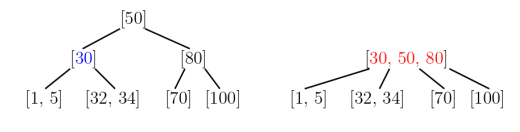

<br>

> 결국 순회하는 건 똑같으니까 $O(\log n)$

`-` Red-Black Tree와의 관계

* 2-3-4 tree -> Red-Black Tree

1. 2 node는 black으로
2. 3 node는 두 레벨에 걸쳐 쪼개지고, 내려갈 친구는 레드, 남을 친구는 블랙
3. 4 node도 두 레벨에 걸쳐 쪼개짐. 가운데에서 양옆으로 내려가고 내려간 친구는 레드, 남을 친구는 블랙

> 3, 4 노드에서도 블랙 노드를 하나만 만들기 때문에 Red-Black Tree의 조건을 위배하지 않음.

* 2-3-4 tree의 높이를 $h$, Red-Black tree의 높이를 $h'$이라 하면

$$\log_4 {n} ≤ h ≤ \log_2 {n} \\
h' ≤ \log_2 {n} \\

\Rightarrow h' ≤ 2 h
$$

> 결론은 2-3-4 트리는 Red-Black 트리로 만들 수 있고, 반대도 가능하다.
>
> 2-3-4 트리를 이용하여 Red-Black 트리를 bound할 수 있음

### Splay 트리